In [1]:
import random as rnd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import CategoricalNB

In [2]:
df_train = pd.read_csv('./dataset/train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
colors = ['#00124D','#34124D','#30E24D','#2752FD','#CCCC00','#00DD30','green','red','blue','#889A5F']

def showHistogram(dataset , title, description, label_object={}):
    
    dataset = dataset.replace(label_object)
    
    bin_value = len(label_object)
    if bin_value == 0:
        bin_value = len(pd.unique(dataset))
    
    _, _ ,patches = plt.hist(dataset, bins = bin_value)
    
    for i in range(bin_value):
        
        patches[i].set_fc(colors[i%10])
        
    plt.title(title)
    plt.xlabel(description)
    plt.show()


In [5]:
def showBoxPlot(set_data,title, description, label_object = {}):
    
    
    if len(label_object) > 0:
        set_data = set_data.replace(label_object)
    
    data = [set_data]
    fig = plt.figure(figsize =(7, 3))
    ax = fig.add_subplot(111)
    
    bp = ax.boxplot(data, patch_artist = True,
                    notch ='True', vert = 0)
    
    plt.title(title)
    plt.xlabel(description)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    plt.show()
    


In [6]:
def showScatter(title,xlable,ylable,set1,set2,label_object1 = {},label_object2 = {}):
    
    if len(label_object1) > 0:
        set1 = set1.replace(label_object1)
    
    if len(label_object2) > 0:
        set2 = set2.replace(label_object2)
    
    plt.scatter(set1, set2)
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.show()
    

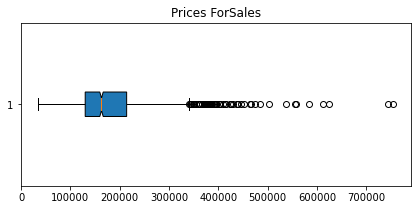

In [7]:
df_train['SalePrice'].describe()
showBoxPlot(df_train['SalePrice'],'Prices ForSales','')

In [8]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


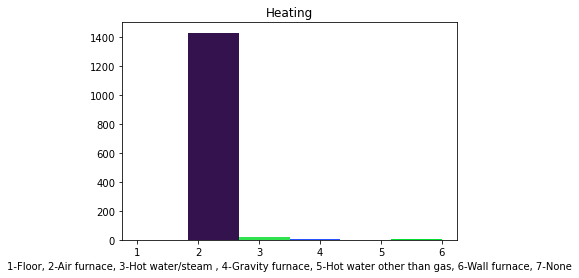

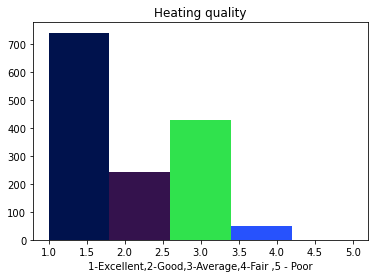

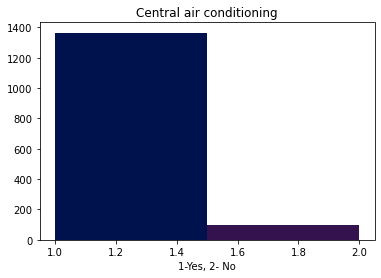

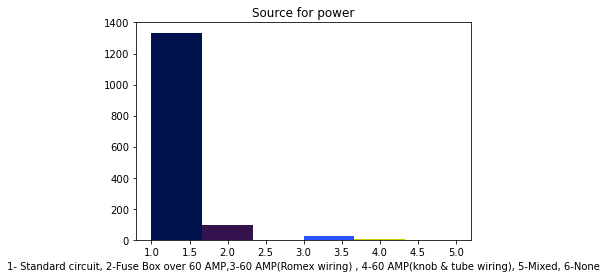

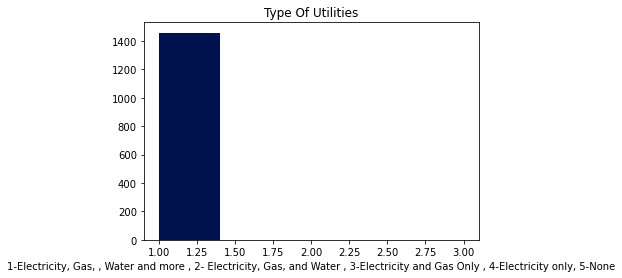

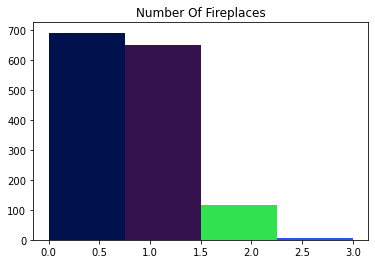

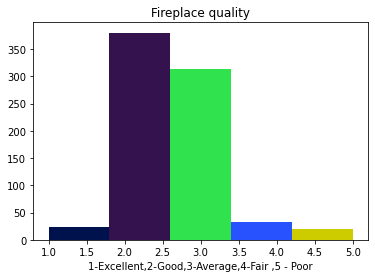

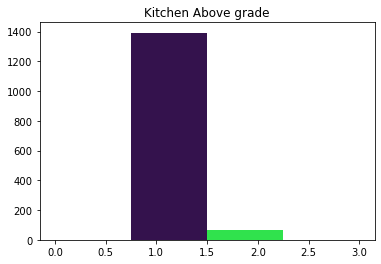

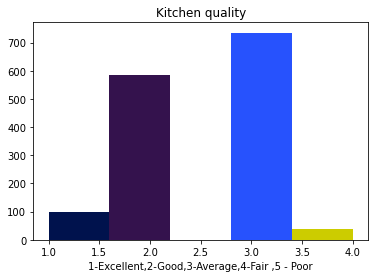

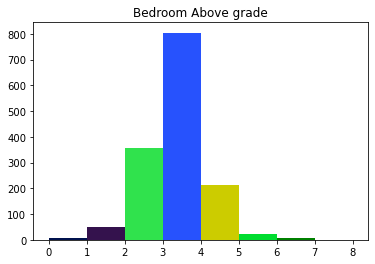

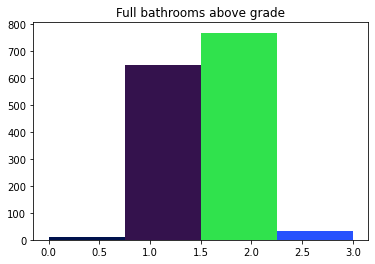

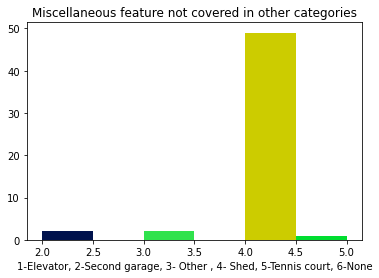

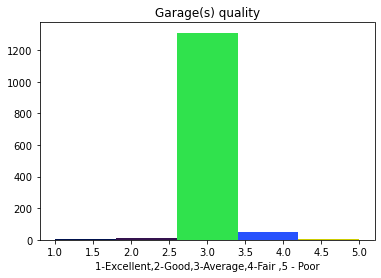

In [9]:
showHistogram(df_train['Heating'], 
                          'Heating',
                      '1-Floor, 2-Air furnace, 3-Hot water/steam , 4-Gravity furnace, 5-Hot water other than gas, 6-Wall furnace, 7-None'
                    , {"Floor" : 1,"GasA" : 2,"GasW": 3,"Grav": 4,"OthW" : 5,"Wall" : 6} )

showHistogram(df_train['HeatingQC'] , 
                          'Heating quality',
                      '1-Excellent,2-Good,3-Average,4-Fair ,5 - Poor', 
                      {"Ex" : 1,"Gd" : 2,"TA": 3,"Fa": 4,"Po" : 5})
    
showHistogram(df_train['CentralAir'] , 
                        'Central air conditioning',
                      '1-Yes, 2- No', {"Y" : 1,"N" : 2})

showHistogram(df_train['Electrical'], 
                          'Source for power',
                      '1- Standard circuit, 2-Fuse Box over 60 AMP,3-60 AMP(Romex wiring) , 4-60 AMP(knob & tube wiring), 5-Mixed, 6-None'
                      , {"SBrkr" : 1,"FuseA" : 2,"FuseF" : 3,"FuseP" : 4,"Mix" : 5,"None" : 6})

showHistogram(df_train['Utilities'] , 
                          'Type Of Utilities',
                      '1-Electricity, Gas, , Water and more , 2- Electricity, Gas, and Water , 3-Electricity and Gas Only , 4-Electricity only, 5-None'
                    , {"AllPub" : 1,"NoSewr" : 2,"NoSeWa" : 3,"ELO" : 4,"None" : 5})

showHistogram(df_train['Fireplaces'],'Number Of Fireplaces','')

showHistogram(df_train['FireplaceQu'] , 
                          'Fireplace quality',
                      '1-Excellent,2-Good,3-Average,4-Fair ,5 - Poor', 
                      {"Ex" : 1,"Gd" : 2,"TA": 3,"Fa": 4,"Po" : 5})

showHistogram(df_train['KitchenAbvGr'],'Kitchen Above grade','')

showHistogram(df_train['KitchenQual'] , 
                          'Kitchen quality',
                      '1-Excellent,2-Good,3-Average,4-Fair ,5 - Poor', 
                      {"Ex" : 1,"Gd" : 2,"TA": 3,"Fa": 4,"Po" : 5})

showHistogram(df_train['BedroomAbvGr'],'Bedroom Above grade','')

showHistogram(df_train['FullBath'],'Full bathrooms above grade','')

showHistogram(df_train['MiscFeature'], 
                        'Miscellaneous feature not covered in other categories',
                      '1-Elevator, 2-Second garage, 3- Other , 4- Shed, 5-Tennis court, 6-None'
                    , {"Elev" : 1,"Gar2" : 2,"Othr": 3,"Shed": 4,"TenC" : 5,"NA" : 6})

showHistogram(df_train['GarageQual'] , 
                          'Garage(s) quality',
                      '1-Excellent,2-Good,3-Average,4-Fair ,5 - Poor', 
                      {"Ex" : 1,"Gd" : 2,"TA": 3,"Fa": 4,"Po" : 5})


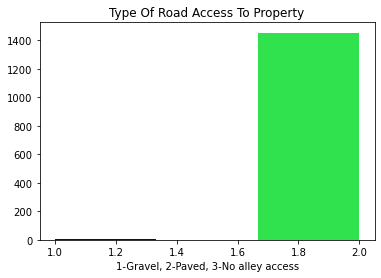

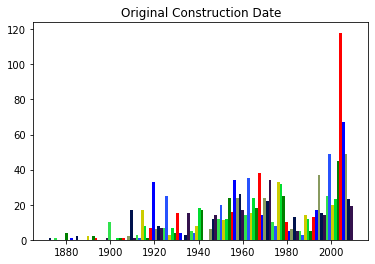

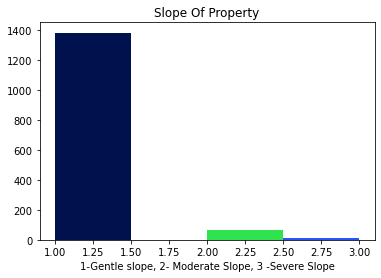

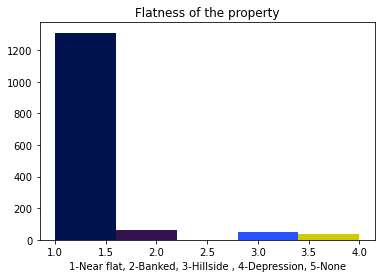

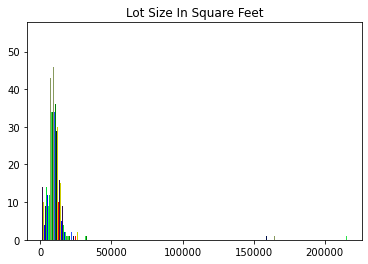

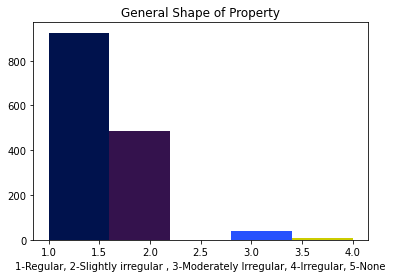

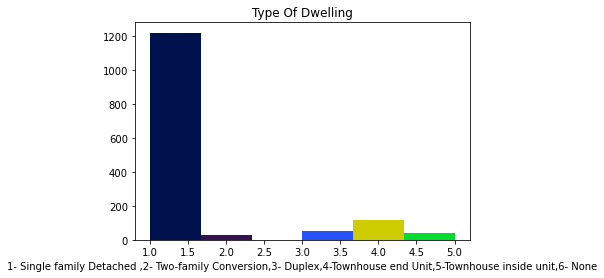

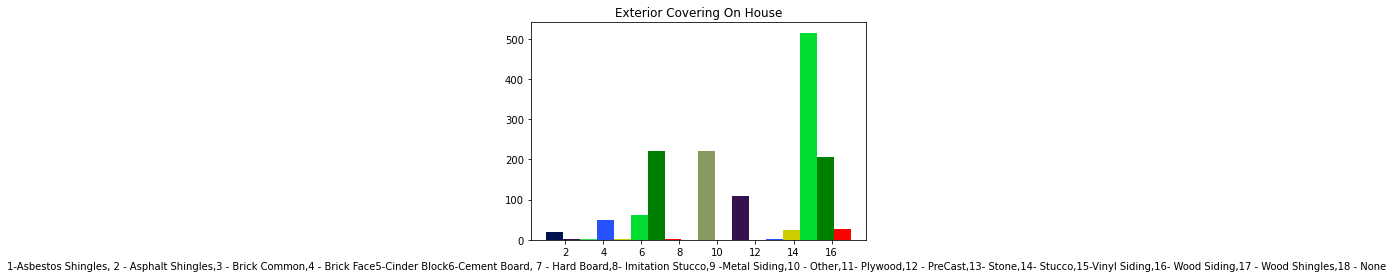

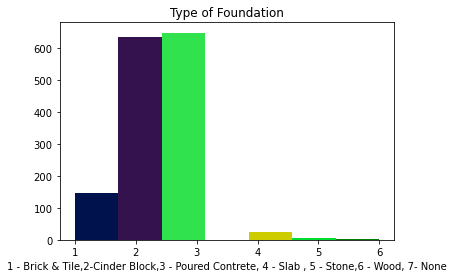

In [10]:
showHistogram(df_train['Street'], 
                          'Type Of Road Access To Property',
                      '1-Gravel, 2-Paved, 3-No alley access'
                    , {"Grvl" : 1, "Pave" : 2, "NA" : 3} )

showHistogram(df_train['YearBuilt'] , 'Original Construction Date','')
    
showHistogram(df_train['LandSlope'] , 
                        'Slope Of Property',
                      '1-Gentle slope, 2- Moderate Slope, 3 -Severe Slope', 
                      {"Gtl" : 1, "Mod" : 2, "Sev" : 3, "None" : 4})

showHistogram(df_train['LandContour'] , 
                          'Flatness of the property',
                      '1-Near flat, 2-Banked, 3-Hillside , 4-Depression, 5-None', 
                      {"Lvl" : 1,"Bnk" : 2,"HLS" : 3,"Low" : 4,"None" : 5})

showHistogram(df_train['LotArea'], 'Lot Size In Square Feet','')

showHistogram(df_train['LotShape'] , 
                          'General Shape of Property',
                      '1-Regular, 2-Slightly irregular , 3-Moderately Irregular, 4-Irregular, 5-None'
                    , {"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4, "None" : 5})

showHistogram(df_train['BldgType'],'Type Of Dwelling',
                      '1- Single family Detached ,2- Two-family Conversion,3- Duplex,4-Townhouse end Unit,5-Townhouse inside unit,6- None',
                      {"1Fam" : 1, "2fmCon" : 2, "Duplex" : 3, "TwnhsE" : 4, "Twnhs" : 5, "None" : 6})

showHistogram(df_train['Exterior1st'],'Exterior Covering On House'
                      ,'1-Asbestos Shingles, 2 - Asphalt Shingles,3 - Brick Common,4 - Brick Face5-Cinder Block6-Cement Board, 7 - Hard Board,8- Imitation Stucco,9 -Metal Siding,10 - Other,11- Plywood,12 - PreCast,13- Stone,14- Stucco,15-Vinyl Siding,16- Wood Siding,17 - Wood Shingles,18 - None '
                      ,{"AsbShng" : 1, "AsphShn" : 2, "BrkComm" : 3, "BrkFace" : 4, "CBlock" : 5, "CemntBd" : 6, "HdBoard" : 7, "ImStucc" : 8, "MetalSd" : 9, "Other" : 10, "Plywood" : 11, "PreCast" : 12, "Stone" : 13, "Stucco" : 14, "VinylSd" : 15, "Wd Sdng" : 16, "WdShing" : 17, "None" : 18})

showHistogram(df_train['Foundation'] , 
                          'Type of Foundation',
                      '1 - Brick & Tile,2-Cinder Block,3 - Poured Contrete, 4 - Slab , 5 - Stone,6 - Wood, 7- None', 
                      {"BrkTil" : 1, "CBlock" : 2, "PConc" : 3, "Slab" : 4, "Stone" : 5, "Wood" : 6, "None" : 7})



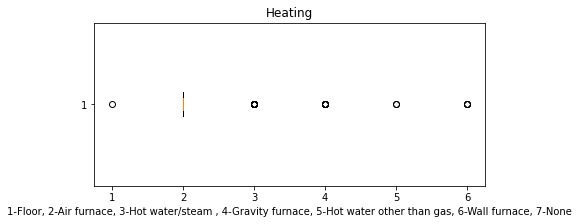

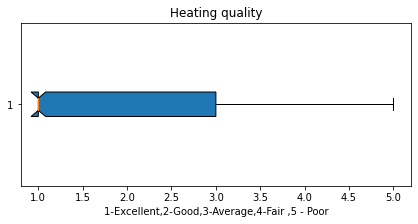

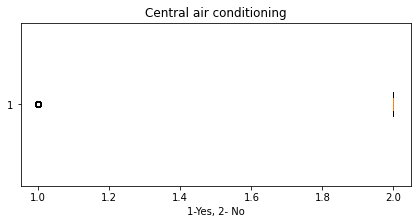

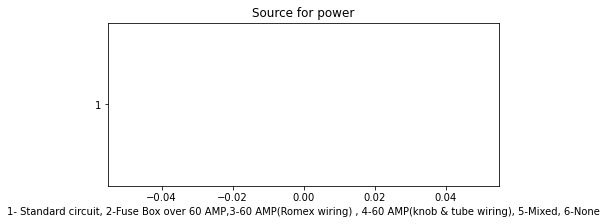

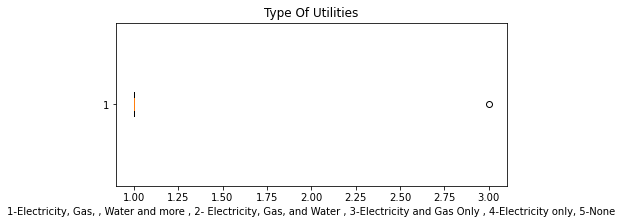

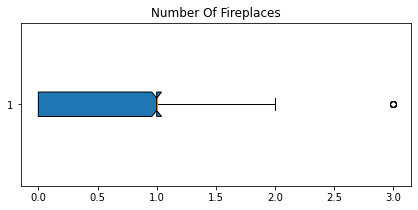

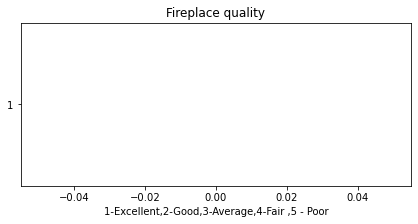

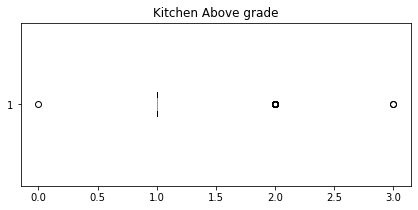

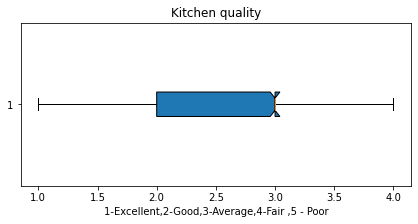

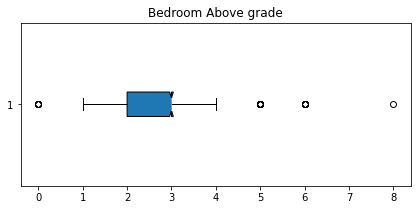

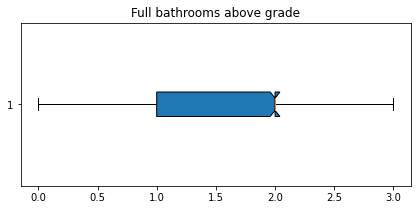

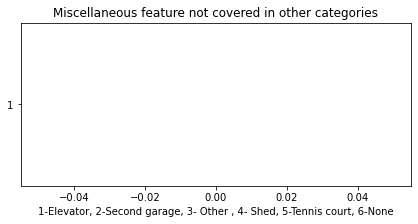

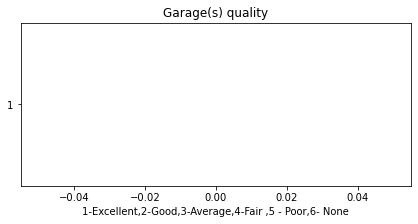

In [11]:
showBoxPlot(df_train['Heating'], 
                          'Heating',
                      '1-Floor, 2-Air furnace, 3-Hot water/steam , 4-Gravity furnace, 5-Hot water other than gas, 6-Wall furnace, 7-None'
                    , {"Floor" : 1,"GasA" : 2,"GasW": 3,"Grav": 4,"OthW" : 5,"Wall" : 6} )

showBoxPlot(df_train['HeatingQC'] , 
                          'Heating quality',
                      '1-Excellent,2-Good,3-Average,4-Fair ,5 - Poor', 
                      {"Ex" : 1,"Gd" : 2,"TA": 3,"Fa": 4,"Po" : 5})

showBoxPlot(df_train['CentralAir'] , 
                        'Central air conditioning',
                      '1-Yes, 2- No', {"N" : 1, "Y" : 2})

showBoxPlot(df_train['Electrical'], 
                          'Source for power',
                      '1- Standard circuit, 2-Fuse Box over 60 AMP,3-60 AMP(Romex wiring) , 4-60 AMP(knob & tube wiring), 5-Mixed, 6-None'
                      , {"SBrkr" : 1,"FuseA" : 2,"FuseF" : 3,"FuseP" : 4,"Mix" : 5,"None" : 6})

showBoxPlot(df_train['Utilities'] , 
                          'Type Of Utilities',
                      '1-Electricity, Gas, , Water and more , 2- Electricity, Gas, and Water , 3-Electricity and Gas Only , 4-Electricity only, 5-None'
                    , {"AllPub" : 1,"NoSewr" : 2,"NoSeWa" : 3,"ELO" : 4,"None" : 5})

showBoxPlot(df_train['Fireplaces'],'Number Of Fireplaces','')

showBoxPlot(df_train['FireplaceQu'] , 
                          'Fireplace quality',
                      '1-Excellent,2-Good,3-Average,4-Fair ,5 - Poor', 
                      {"Ex" : 1,"Gd" : 2,"TA": 3,"Fa": 4,"Po" : 5})

showBoxPlot(df_train['KitchenAbvGr'],'Kitchen Above grade','')

showBoxPlot(df_train['KitchenQual'] , 
                          'Kitchen quality',
                      '1-Excellent,2-Good,3-Average,4-Fair ,5 - Poor', 
                      {"Ex" : 1,"Gd" : 2,"TA": 3,"Fa": 4,"Po" : 5})

showBoxPlot(df_train['BedroomAbvGr'],'Bedroom Above grade','')

showBoxPlot(df_train['FullBath'],'Full bathrooms above grade','')

showBoxPlot(df_train['MiscFeature'], 
                        'Miscellaneous feature not covered in other categories',
                      '1-Elevator, 2-Second garage, 3- Other , 4- Shed, 5-Tennis court, 6-None'
                    , {"Elev" : 1,"Gar2" : 2,"Othr": 3,"Shed": 4,"TenC" : 5,"NA" : 6})

showBoxPlot(df_train['GarageQual'] , 
                          'Garage(s) quality',
                      '1-Excellent,2-Good,3-Average,4-Fair ,5 - Poor,6- None', 
                      {"Ex" : 1,"Gd" : 2,"TA": 3,"Fa": 4,"Po" : 5,'Na':6})

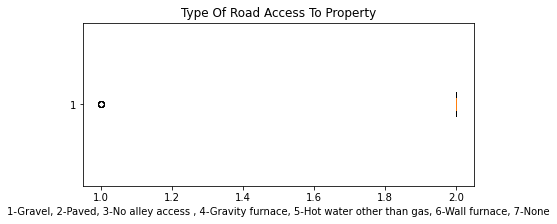

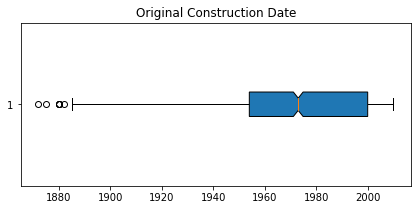

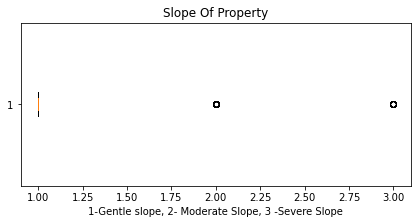

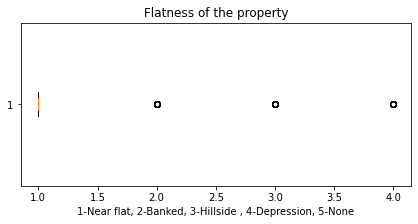

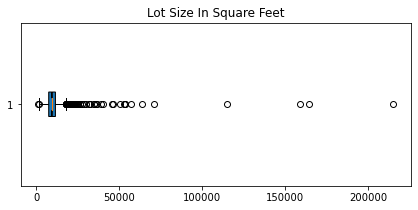

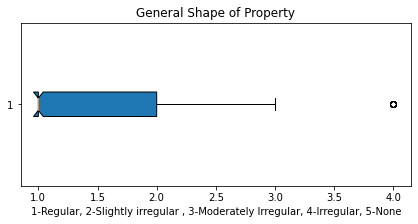

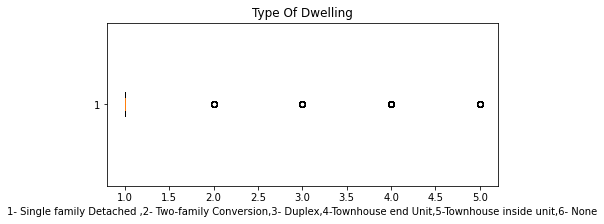

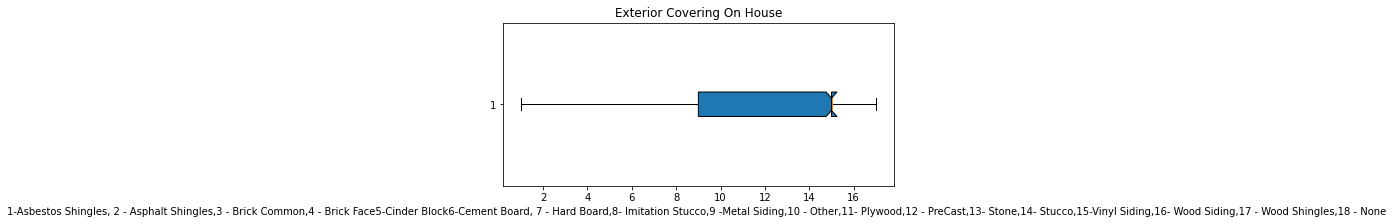

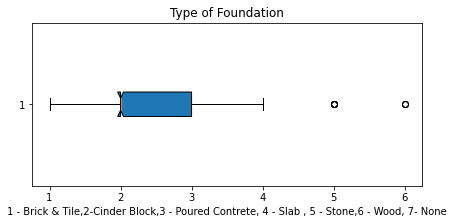

In [12]:
showBoxPlot(df_train['Street'], 
                          'Type Of Road Access To Property',
                      '1-Gravel, 2-Paved, 3-No alley access , 4-Gravity furnace, 5-Hot water other than gas, 6-Wall furnace, 7-None'
                    , {"Grvl" : 1, "Pave" : 2, "NA" : 3} )

showBoxPlot(df_train['YearBuilt'] , 'Original Construction Date','')

showBoxPlot(df_train['LandSlope'] , 
                        'Slope Of Property',
                      '1-Gentle slope, 2- Moderate Slope, 3 -Severe Slope', {"Gtl" : 1, "Mod" : 2, "Sev" : 3, "None" : 4})

showBoxPlot(df_train['LandContour'] , 
                          'Flatness of the property',
                      '1-Near flat, 2-Banked, 3-Hillside , 4-Depression, 5-None', 
                      {"Lvl" : 1,"Bnk" : 2,"HLS" : 3,"Low" : 4,"None" : 5})

showBoxPlot(df_train['LotArea'], 'Lot Size In Square Feet','')

showBoxPlot(df_train['LotShape'] , 
                          'General Shape of Property',
                      '1-Regular, 2-Slightly irregular , 3-Moderately Irregular, 4-Irregular, 5-None'
                    , {"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4, "None" : 5})

showBoxPlot(df_train['BldgType'],'Type Of Dwelling',
                      '1- Single family Detached ,2- Two-family Conversion,3- Duplex,4-Townhouse end Unit,5-Townhouse inside unit,6- None',
                      {"1Fam" : 1, "2fmCon" : 2, "Duplex" : 3, "TwnhsE" : 4, "Twnhs" : 5, "None" : 6})

showBoxPlot(df_train['Exterior1st'],'Exterior Covering On House'
                      ,'1-Asbestos Shingles, 2 - Asphalt Shingles,3 - Brick Common,4 - Brick Face5-Cinder Block6-Cement Board, 7 - Hard Board,8- Imitation Stucco,9 -Metal Siding,10 - Other,11- Plywood,12 - PreCast,13- Stone,14- Stucco,15-Vinyl Siding,16- Wood Siding,17 - Wood Shingles,18 - None '
                      ,{"AsbShng" : 1, "AsphShn" : 2, "BrkComm" : 3, "BrkFace" : 4, "CBlock" : 5, "CemntBd" : 6, "HdBoard" : 7, "ImStucc" : 8, "MetalSd" : 9, "Other" : 10, "Plywood" : 11, "PreCast" : 12, "Stone" : 13, "Stucco" : 14, "VinylSd" : 15, "Wd Sdng" : 16, "WdShing" : 17, "None" : 18})

showBoxPlot(df_train['Foundation'] , 
                          'Type of Foundation',
                      '1 - Brick & Tile,2-Cinder Block,3 - Poured Contrete, 4 - Slab , 5 - Stone,6 - Wood, 7- None', 
                      {"BrkTil" : 1, "CBlock" : 2, "PConc" : 3, "Slab" : 4, "Stone" : 5, "Wood" : 6, "None" : 7})



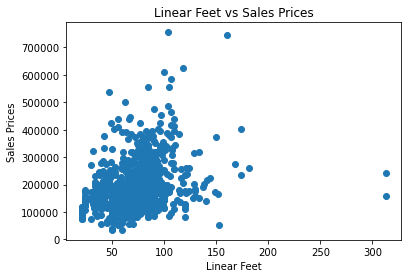

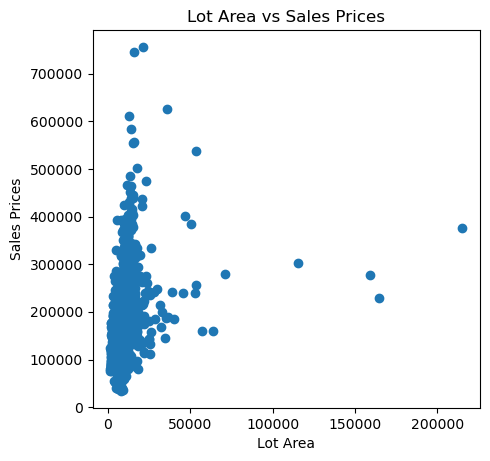

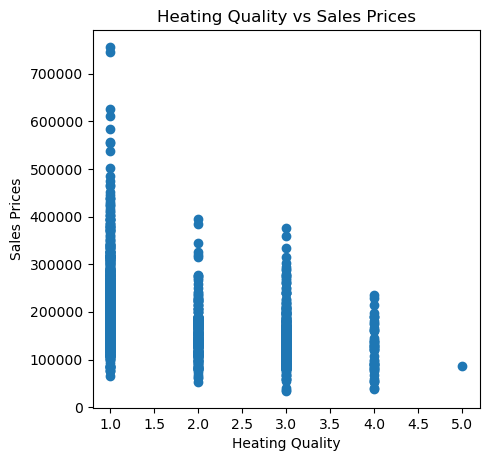

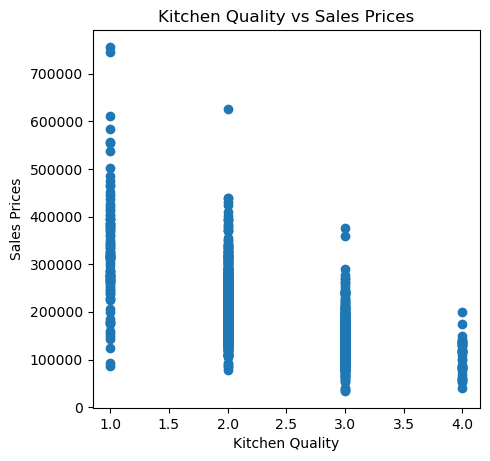

In [13]:

showScatter('Linear Feet vs Sales Prices','Linear Feet','Sales Prices',df_train['LotFrontage'],df_train['SalePrice'])

showScatter('Lot Area vs Sales Prices','Lot Area','Sales Prices',df_train['LotArea'], df_train['SalePrice'])

showScatter('Heating Quality vs Sales Prices','Heating Quality','Sales Prices',df_train['HeatingQC'], df_train['SalePrice'],{"Ex" : 1,"Gd" : 2,"TA": 3,"Fa": 4,"Po" : 5})

showScatter('Kitchen Quality vs Sales Prices','Kitchen Quality','Sales Prices',df_train['KitchenQual'], df_train['SalePrice'],{"Ex" : 1,"Gd" : 2,"TA": 3,"Fa": 4,"Po" : 5})


### Pre Process For Dataset

Get Internal Features

In [14]:
internal_featues1 = ['Electrical',
                    'Heating',
                    'HeatingQC',
                    'CentralAir',
                    'Utilities',
                    'Fireplaces',
                    'FireplaceQu',
                    'KitchenAbvGr',
                    'KitchenQual',
                    'BedroomAbvGr',
                    'MiscFeature',
                    'GarageQual',
                    'FullBath',
                    'SalePrice']
                    
                    
internal_features_dataset = df_train[internal_featues1]

In [15]:
external_featues = ['Street',
                    'YearBuilt',
                    'LandSlope',
                    'LotArea',
                    'LotShape',
                    'LotFrontage',
                    'BldgType',
                    'LandContour',
                    'Exterior1st',
                    'Foundation',
                    'SalePrice']
                    
                    
external_features_dataset = df_train[external_featues]

In [16]:
internal_features_dataset

,Electrical,Heating,HeatingQC,CentralAir,Utilities,Fireplaces,FireplaceQu,KitchenAbvGr,KitchenQual,BedroomAbvGr,MiscFeature,GarageQual,FullBath,SalePrice
0,SBrkr,GasA,Ex,Y,AllPub,0,NaN,1,Gd,3,NaN,TA,2,208500
1,SBrkr,GasA,Ex,Y,AllPub,1,TA,1,TA,3,NaN,TA,2,181500
2,SBrkr,GasA,Ex,Y,AllPub,1,TA,1,Gd,3,NaN,TA,2,223500
3,SBrkr,GasA,Gd,Y,AllPub,1,Gd,1,Gd,3,NaN,TA,1,140000
4,SBrkr,GasA,Ex,Y,AllPub,1,TA,1,Gd,4,NaN,TA,2,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SBrkr,GasA,Ex,Y,AllPub,1,TA,1,TA,3,NaN,TA,2,175000
1456,SBrkr,GasA,TA,Y,AllPub,2,TA,1,TA,3,NaN,TA,2,210000
1457,SBrkr,GasA,Ex,Y,AllPub,2,Gd,1,Gd,4,Shed,TA,2,266500
1458,FuseA,GasA,Gd,Y,AllPub,0,NaN,1,Gd,2,NaN,TA,1,142125


In [17]:
external_features_dataset

,Street,YearBuilt,LandSlope,LotArea,LotShape,LotFrontage,BldgType,LandContour,Exterior1st,Foundation,SalePrice
0,Pave,2003,Gtl,8450,Reg,65.0,1Fam,Lvl,VinylSd,PConc,208500
1,Pave,1976,Gtl,9600,Reg,80.0,1Fam,Lvl,MetalSd,CBlock,181500
2,Pave,2001,Gtl,11250,IR1,68.0,1Fam,Lvl,VinylSd,PConc,223500
3,Pave,1915,Gtl,9550,IR1,60.0,1Fam,Lvl,Wd Sdng,BrkTil,140000
4,Pave,2000,Gtl,14260,IR1,84.0,1Fam,Lvl,VinylSd,PConc,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,1999,Gtl,7917,Reg,62.0,1Fam,Lvl,VinylSd,PConc,175000
1456,Pave,1978,Gtl,13175,Reg,85.0,1Fam,Lvl,Plywood,CBlock,210000
1457,Pave,1941,Gtl,9042,Reg,66.0,1Fam,Lvl,CemntBd,Stone,266500
1458,Pave,1950,Gtl,9717,Reg,68.0,1Fam,Lvl,MetalSd,CBlock,142125


In [18]:
corr = internal_features_dataset.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice       1.000000
FullBath        0.560664
Fireplaces      0.466929
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64


In [19]:
corr2 = external_features_dataset.corr()
corr2.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr2.SalePrice)

SalePrice      1.000000
YearBuilt      0.522897
LotFrontage    0.351799
LotArea        0.263843
Name: SalePrice, dtype: float64


In [20]:
step = (df_train['SalePrice'].max() - df_train['SalePrice'].min()) // 5
min = df_train['SalePrice'].min()                      #34900
bound1 = step + df_train['SalePrice'].min()            #178920
bound2 = (2 * step) + df_train['SalePrice'].min()      #322940
bound3 = (3 * step) + df_train['SalePrice'].min()      #466960
bound4 = (4 * step) + df_train['SalePrice'].min()      #610980
max = df_train['SalePrice'].max()                      #755000

In [21]:
class_y = df_train['SalePrice'].mask((df_train['SalePrice'] >= min) & (bound1 > df_train['SalePrice']),1)
class_y = class_y.mask((class_y >= bound1) & (bound2 > class_y),2)
class_y = class_y.mask((class_y >= bound2) & (bound3 > class_y),3)
class_y = class_y.mask((class_y >= bound3) & (bound4 > class_y),4)
class_y = class_y.mask((class_y >= bound4) & (max >= class_y),5)

In [22]:
class_y

0       2
1       2
2       2
3       1
4       2
       ..
1455    1
1456    2
1457    2
1458    1
1459    1
Name: SalePrice, Length: 1460, dtype: int64

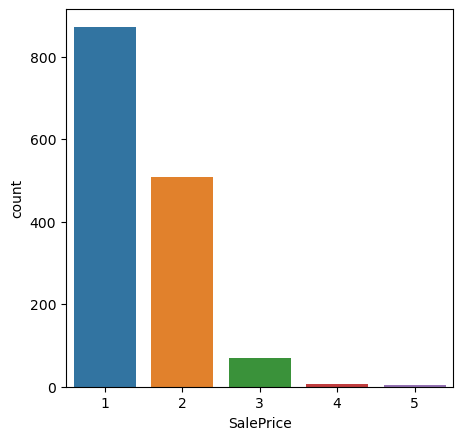

In [23]:

sns.countplot(class_y,label="Count")
plt.show()

In [24]:
internal_features_dataset.loc[:,"MiscFeature"] = internal_features_dataset.loc[:,"MiscFeature"].fillna("None")
internal_features_dataset.loc[:,"Utilities"] = internal_features_dataset.loc[:,"Utilities"].fillna("None")
internal_features_dataset.loc[:,"Electrical"] = internal_features_dataset.loc[:,"Electrical"].fillna("None")
internal_features_dataset.loc[:,"CentralAir"] = internal_features_dataset.loc[:,"CentralAir"].fillna("N")
internal_features_dataset.loc[:,"Heating"] = internal_features_dataset.loc[:,"Heating"].fillna("None")
internal_features_dataset.loc[:,"HeatingQC"] = internal_features_dataset.loc[:,"HeatingQC"].fillna("None")
internal_features_dataset.loc[:,"FireplaceQu"] = internal_features_dataset.loc[:,"FireplaceQu"].fillna("None")
internal_features_dataset.loc[:,"KitchenQual"] = internal_features_dataset.loc[:,"KitchenQual"].fillna("None")
internal_features_dataset.loc[:,"GarageQual"] = internal_features_dataset.loc[:,"GarageQual"].fillna("None")

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
LotFrontage_mean = external_features_dataset["LotFrontage"].mean()

In [26]:
external_features_dataset.loc[:,"Street"] = external_features_dataset.loc[:,"Street"].fillna("None")
external_features_dataset.loc[:,"LotShape"] = external_features_dataset.loc[:,"LotShape"].fillna("None")
external_features_dataset.loc[:,"LandContour"] = external_features_dataset.loc[:,"LandContour"].fillna("None")
external_features_dataset.loc[:,"LandSlope"] = external_features_dataset.loc[:,"LandSlope"].fillna("None")
external_features_dataset.loc[:,"BldgType"] = external_features_dataset.loc[:,"BldgType"].fillna("None")
external_features_dataset.loc[:,"Exterior1st"] = external_features_dataset.loc[:,"Exterior1st"].fillna("None")
external_features_dataset.loc[:,"Foundation"] = external_features_dataset.loc[:,"Foundation"].fillna("None")
external_features_dataset.loc[:,"YearBuilt"] = external_features_dataset.loc[:,"YearBuilt"].fillna(1900)
external_features_dataset.loc[:,"LotArea"] = external_features_dataset.loc[:,"LotArea"].fillna(df_train["LotArea"].mean())
external_features_dataset["LotFrontage"] = external_features_dataset["LotFrontage"].replace(np.nan, LotFrontage_mean)
external_features_dataset.loc[:,"Foundation"] = external_features_dataset.loc[:,"Foundation"].fillna("None")

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_20552/3244565711.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  external_features_dataset["LotFrontage"] = external_features_dataset["LotFrontage"].replace(np.nan, LotFrontage_mean)


In [27]:
external_features_dataset

,Street,YearBuilt,LandSlope,LotArea,LotShape,LotFrontage,BldgType,LandContour,Exterior1st,Foundation,SalePrice
0,Pave,2003,Gtl,8450,Reg,65.0,1Fam,Lvl,VinylSd,PConc,208500
1,Pave,1976,Gtl,9600,Reg,80.0,1Fam,Lvl,MetalSd,CBlock,181500
2,Pave,2001,Gtl,11250,IR1,68.0,1Fam,Lvl,VinylSd,PConc,223500
3,Pave,1915,Gtl,9550,IR1,60.0,1Fam,Lvl,Wd Sdng,BrkTil,140000
4,Pave,2000,Gtl,14260,IR1,84.0,1Fam,Lvl,VinylSd,PConc,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,1999,Gtl,7917,Reg,62.0,1Fam,Lvl,VinylSd,PConc,175000
1456,Pave,1978,Gtl,13175,Reg,85.0,1Fam,Lvl,Plywood,CBlock,210000
1457,Pave,1941,Gtl,9042,Reg,66.0,1Fam,Lvl,CemntBd,Stone,266500
1458,Pave,1950,Gtl,9717,Reg,68.0,1Fam,Lvl,MetalSd,CBlock,142125


In [28]:
#nan_idx_array = external_features_dataset['LotFrontage'].index[df_train['LotFrontage'].apply(np.isnan)]

In [29]:
#for idx in nan_idx_array:
#   external_features_dataset['LotFrontage'].iloc[idx] = df_train["LotFrontage"].mean()

In [30]:
internal_features_dataset = internal_features_dataset.replace({
                                "Heating" : {"Floor" : 1, "GasA" : 2, "GasW": 3, "Grav": 4, "OthW" : 5, "Wall" : 6, "None" : 7},
                                "HeatingQC" : {"Ex" : 1, "Gd" : 2, "TA": 3, "Fa": 4, "Po" : 5, "None" :6},
                                "FireplaceQu" : {"Ex" : 1, "Gd" : 2, "TA": 3, "Fa": 4, "Po" : 5, "None" :6},
                                "KitchenQual" : {"Ex" : 1, "Gd" : 2, "TA": 3, "Fa": 4, "Po" : 5, "None" :6},
                                "GarageQual" : {"Ex" : 1, "Gd" : 2, "TA": 3, "Fa": 4, "Po" : 5, "None" :6},
                               "MiscFeature" : {"Elev" : 1, "Gar2" : 2, "Othr" : 3, "Shed" : 4, "TenC": 5, "None" : 6},
                               "CentralAir" : {"N" : 1, "Y" : 2},
                               "Electrical" : {"SBrkr" : 1, "FuseA" : 2, "FuseF" : 3, "FuseP" : 4, "Mix" : 5, "None" : 6},
                               "Utilities" : {"AllPub" : 1, "NoSewr" : 2, "NoSeWa" : 3, "ELO" : 4, "None" : 5}
                                }
                             )
internal_features_dataset

,Electrical,Heating,HeatingQC,CentralAir,Utilities,Fireplaces,FireplaceQu,KitchenAbvGr,KitchenQual,BedroomAbvGr,MiscFeature,GarageQual,FullBath,SalePrice
0,1,2,1,2,1,0,6,1,2,3,6,3,2,208500
1,1,2,1,2,1,1,3,1,3,3,6,3,2,181500
2,1,2,1,2,1,1,3,1,2,3,6,3,2,223500
3,1,2,2,2,1,1,2,1,2,3,6,3,1,140000
4,1,2,1,2,1,1,3,1,2,4,6,3,2,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,2,1,2,1,1,3,1,3,3,6,3,2,175000
1456,1,2,3,2,1,2,3,1,3,3,6,3,2,210000
1457,1,2,1,2,1,2,2,1,2,4,4,3,2,266500
1458,2,2,2,2,1,0,6,1,2,2,6,3,1,142125


In [31]:
external_features_dataset = external_features_dataset.replace({"Street" : {"Grvl" : 1, "Pave" : 2, "None" : 3},
                               "LotShape" : {"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4, "None" : 5},
                               "LandContour" : {"Lvl" : 1, "Bnk" : 2, "HLS" : 3, "Low" : 4, "None" : 5},
                               "LandSlope" : {"Gtl" : 1, "Mod" : 2, "Sev" : 3, "None" : 4},
                               "BldgType" : {"1Fam" : 1, "2fmCon" : 2, "Duplex" : 3, "TwnhsE" : 4, "Twnhs" : 5, "None" : 6},
                               "Exterior1st" : {"AsbShng" : 1, "AsphShn" : 2, "BrkComm" : 3, "BrkFace" : 4, "CBlock" : 5, "CemntBd" : 6, "HdBoard" : 7, "ImStucc" : 8, "MetalSd" : 9, "Other" : 10, "Plywood" : 11, "PreCast" : 12, "Stone" : 13, "Stucco" : 14, "VinylSd" : 15, "Wd Sdng" : 16, "WdShing" : 17, "None" : 18},
                               "Foundation" : {"BrkTil" : 1, "CBlock" : 2, "PConc" : 3, "Slab" : 4, "Stone" : 5, "Wood" : 6, "None" : 7}}
                             )
external_features_dataset

,Street,YearBuilt,LandSlope,LotArea,LotShape,LotFrontage,BldgType,LandContour,Exterior1st,Foundation,SalePrice
0,2,2003,1,8450,1,65.0,1,1,15,3,208500
1,2,1976,1,9600,1,80.0,1,1,9,2,181500
2,2,2001,1,11250,2,68.0,1,1,15,3,223500
3,2,1915,1,9550,2,60.0,1,1,16,1,140000
4,2,2000,1,14260,2,84.0,1,1,15,3,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,2,1999,1,7917,1,62.0,1,1,15,3,175000
1456,2,1978,1,13175,1,85.0,1,1,11,2,210000
1457,2,1941,1,9042,1,66.0,1,1,6,5,266500
1458,2,1950,1,9717,1,68.0,1,1,9,2,142125


In [32]:

internal_features_dataset = internal_features_dataset.drop(columns=['SalePrice'])

In [33]:
external_features_dataset = external_features_dataset.drop(columns=['SalePrice'])

In [34]:


train_set, test_set, train_result, test_result = train_test_split(internal_features_dataset, class_y, test_size = 0.3, random_state = 0)
print(train_set.shape)
print(test_set.shape)
print(train_result.shape)
print(test_result.shape)

(1022, 13)
(438, 13)
(1022,)
(438,)


In [35]:


train_set2, test_set2, train_result2, test_result2 = train_test_split(external_features_dataset, class_y, test_size = 0.3, random_state = 0)
print(train_set2.shape)
print(test_set2.shape)
print(train_result2.shape)
print(test_result2.shape)

(1022, 10)
(438, 10)
(1022,)
(438,)


### Classification And Results

In [36]:
def classificateByKNeighbors(train_dataset,train_result,test_dataset,test_result,num_of_class = 5, weights = 'uniform' ,leaf_size = 30):
    
    knn = KNeighborsClassifier(n_neighbors = num_of_class, weights=weights ,leaf_size = leaf_size)
    knn.fit(train_dataset, train_result)
    print("======K-Nearest Neighbors Classification(number of classes = {}, weights = {},leaf size = {})===="
                                             .format(num_of_class,weights,leaf_size))
    print('Accuracy of K-NN classifier on training set: {:.2f}'
         .format(knn.score(train_dataset, train_result)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(knn.score(test_dataset, test_result)))
    
    knn_predict_result = knn.predict(test_dataset)

    result_confusion_matrix = confusion_matrix(knn_predict_result, test_result) 

    f,ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(result_confusion_matrix, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


    print("f1-score :" + str(f1_score(test_result, knn_predict_result, average="macro")))
    print("precision score :" + str(precision_score(test_result, knn_predict_result, average="macro")))
    print("recall score :" + str(recall_score(test_result, knn_predict_result, average="macro")))
    print("=====================================================")
    
    

======K-Nearest Neighbors Classification(number of classes = 5, weights = uniform,leaf size = 30)====
Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.76


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


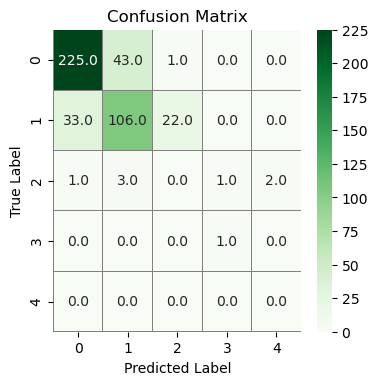

f1-score :0.4392511375738213
precision score :0.4989632639867002
recall score :0.41321885795570007
======K-Nearest Neighbors Classification(number of classes = 10, weights = uniform,leaf size = 30)====
Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.79


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


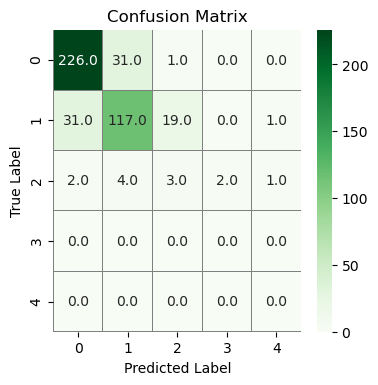

f1-score :0.3553906465874551
precision score :0.3644795127353267
recall score :0.3545516994601663
======K-Nearest Neighbors Classification(number of classes = 15, weights = uniform,leaf size = 30)====
Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.79


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


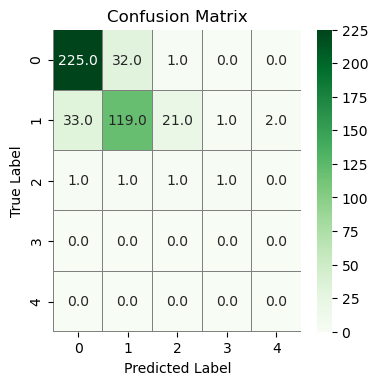

f1-score :0.3340180039453522
precision score :0.3596458773784355
recall score :0.3390197732875079
======K-Nearest Neighbors Classification(number of classes = 5, weights = distance,leaf size = 30)====
Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.74


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


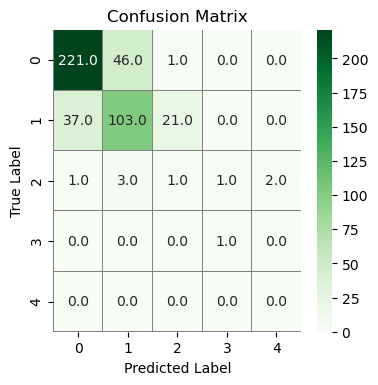

f1-score :0.4456078875949019
precision score :0.5178756836933346
recall score :0.4148783386197573
======K-Nearest Neighbors Classification(number of classes = 10, weights = distance,leaf size = 30)====
Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.78


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


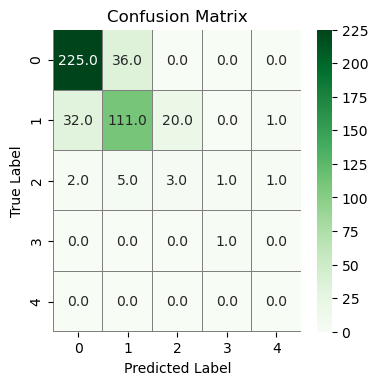

f1-score :0.4812022998098947
precision score :0.5577796467619849
recall score :0.44588476184586023
======K-Nearest Neighbors Classification(number of classes = 15, weights = distance,leaf size = 30)====
Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.78


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


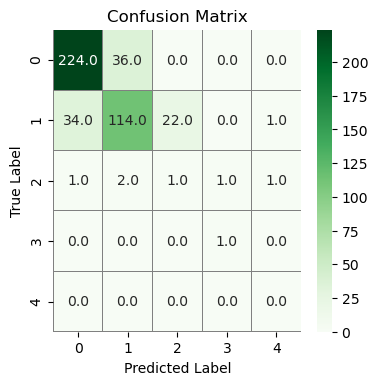

f1-score :0.4609425990846807
precision score :0.538974358974359
recall score :0.4316686251468861
======K-Nearest Neighbors Classification(number of classes = 5, weights = uniform,leaf size = 60)====
Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.76


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


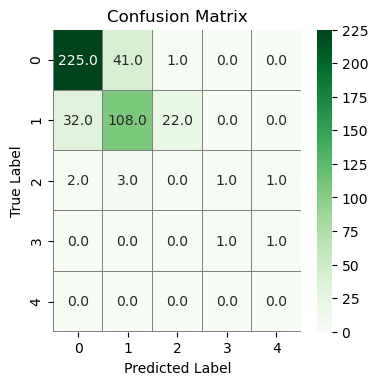

f1-score :0.40868227943135305
precision score :0.40187265917602993
recall score :0.4158504369030685
======K-Nearest Neighbors Classification(number of classes = 10, weights = uniform,leaf size = 60)====
Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.79


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


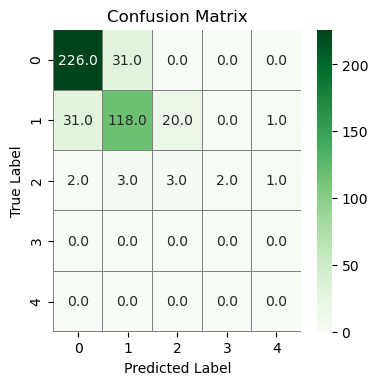

f1-score :0.35707176702834825
precision score :0.3692444703385422
recall score :0.35586748893385045
======K-Nearest Neighbors Classification(number of classes = 15, weights = uniform,leaf size = 60)====
Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.78


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


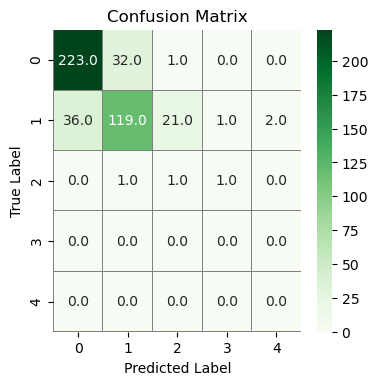

f1-score :0.33239514540544074
precision score :0.37384631052141526
recall score :0.33747537174310627
======K-Nearest Neighbors Classification(number of classes = 5, weights = distance,leaf size = 60)====
Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.74


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


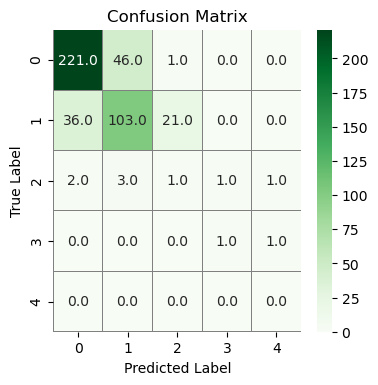

f1-score :0.4126964433416046
precision score :0.4186753731343284
recall score :0.4148783386197573
======K-Nearest Neighbors Classification(number of classes = 10, weights = distance,leaf size = 60)====
Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.77


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


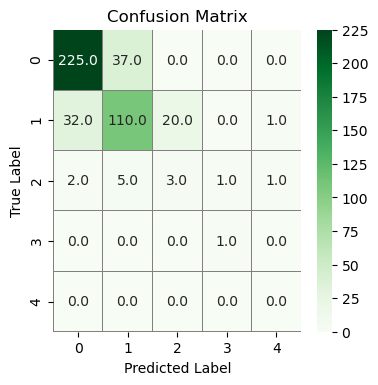

f1-score :0.48004630899064676
precision score :0.5567250503442139
recall score :0.44456897237217596
======K-Nearest Neighbors Classification(number of classes = 15, weights = distance,leaf size = 60)====
Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.78


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


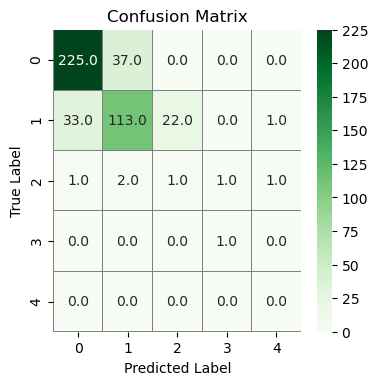

f1-score :0.4606811273180207
precision score :0.5388168691750606
recall score :0.43112503644540257


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:

classificateByKNeighbors(train_set,train_result,test_set,test_result,5,'uniform' ,30)
classificateByKNeighbors(train_set,train_result,test_set,test_result,10,'uniform' ,30)
classificateByKNeighbors(train_set,train_result,test_set,test_result,15,'uniform' ,30)

classificateByKNeighbors(train_set,train_result,test_set,test_result,5,'distance' ,30)
classificateByKNeighbors(train_set,train_result,test_set,test_result,10,'distance' ,30)
classificateByKNeighbors(train_set,train_result,test_set,test_result,15,'distance' ,30)

classificateByKNeighbors(train_set,train_result,test_set,test_result,5,'uniform' ,60)
classificateByKNeighbors(train_set,train_result,test_set,test_result,10,'uniform' ,60)
classificateByKNeighbors(train_set,train_result,test_set,test_result,15,'uniform' ,60)

classificateByKNeighbors(train_set,train_result,test_set,test_result,5,'distance' ,60)
classificateByKNeighbors(train_set,train_result,test_set,test_result,10,'distance' ,60)
classificateByKNeighbors(train_set,train_result,test_set,test_result,15,'distance' ,60)


======K-Nearest Neighbors Classification(number of classes = 5, weights = uniform,leaf size = 30)====
Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.70


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


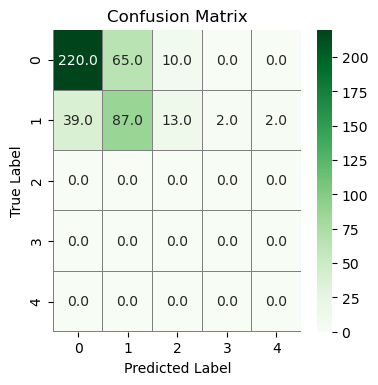

f1-score :0.27681086703787555
precision score :0.27083086405120305
recall score :0.28435785409469616
======K-Nearest Neighbors Classification(number of classes = 10, weights = uniform,leaf size = 30)====
Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.64


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


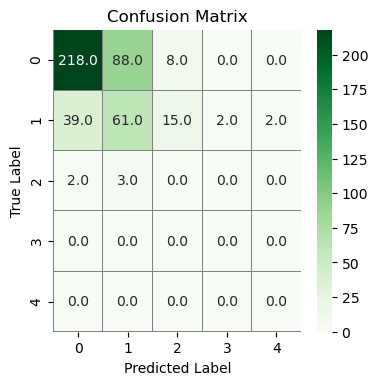

f1-score :0.24221840124160404
precision score :0.2413745115880747
recall score :0.24860292623450517
======K-Nearest Neighbors Classification(number of classes = 15, weights = uniform,leaf size = 30)====
Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.66


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


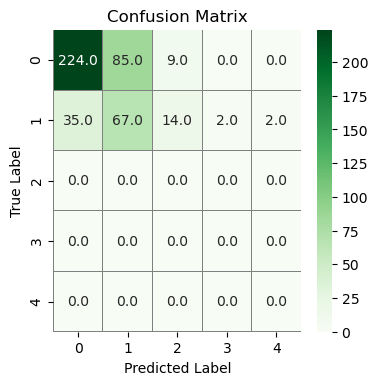

f1-score :0.25381537363645634
precision score :0.25254716981132075
recall score :0.2611308677098151
======K-Nearest Neighbors Classification(number of classes = 5, weights = distance,leaf size = 30)====
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.71


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


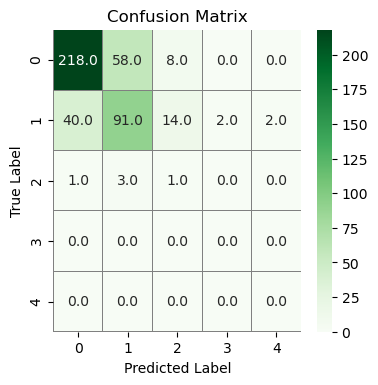

f1-score :0.29580526544422214
precision score :0.31566877776727476
recall score :0.2967722626189445
======K-Nearest Neighbors Classification(number of classes = 10, weights = distance,leaf size = 30)====
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.72


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


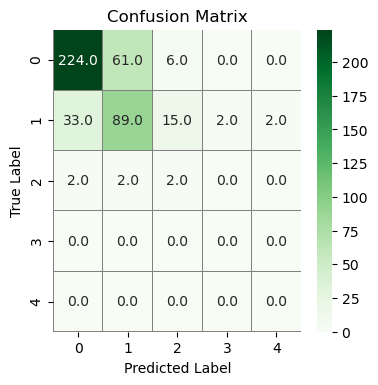

f1-score :0.3119970042902843
precision score :0.346859691452804
recall score :0.3074695404786938
======K-Nearest Neighbors Classification(number of classes = 15, weights = distance,leaf size = 30)====
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.72


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


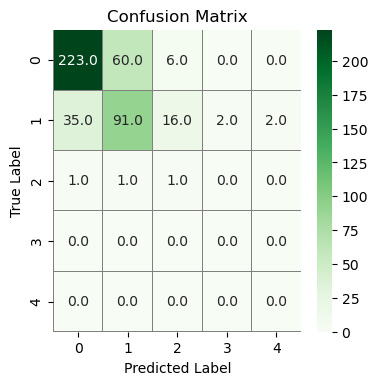

f1-score :0.300305989019064
precision score :0.34564946042881295
recall score :0.30063326647994837
======K-Nearest Neighbors Classification(number of classes = 5, weights = uniform,leaf size = 60)====
Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.70


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


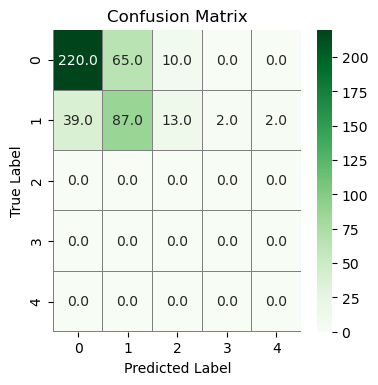

f1-score :0.27681086703787555
precision score :0.27083086405120305
recall score :0.28435785409469616
======K-Nearest Neighbors Classification(number of classes = 10, weights = uniform,leaf size = 60)====
Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.64


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


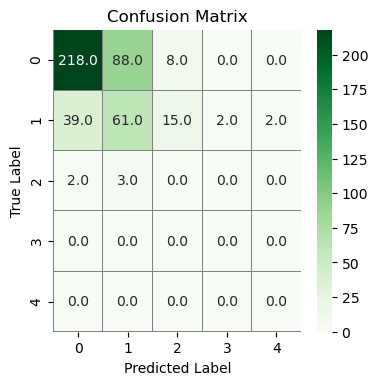

f1-score :0.24221840124160404
precision score :0.2413745115880747
recall score :0.24860292623450517
======K-Nearest Neighbors Classification(number of classes = 15, weights = uniform,leaf size = 60)====
Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.66


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


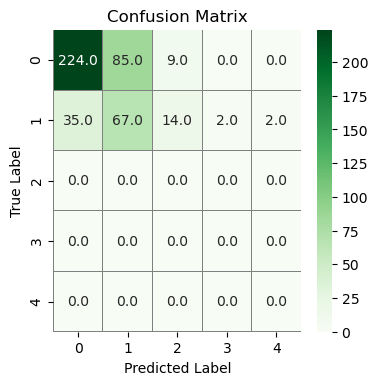

f1-score :0.25381537363645634
precision score :0.25254716981132075
recall score :0.2611308677098151
======K-Nearest Neighbors Classification(number of classes = 5, weights = distance,leaf size = 60)====
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.71


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


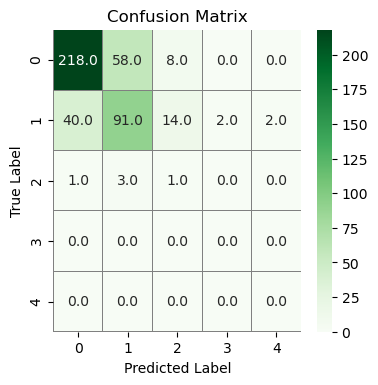

f1-score :0.29580526544422214
precision score :0.31566877776727476
recall score :0.2967722626189445
======K-Nearest Neighbors Classification(number of classes = 10, weights = distance,leaf size = 60)====
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.72


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


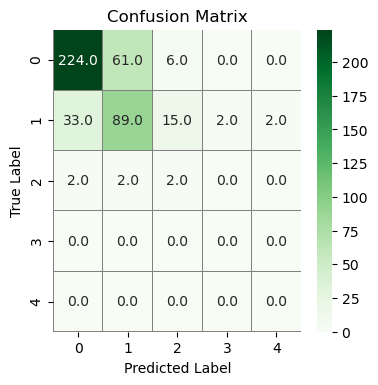

f1-score :0.3119970042902843
precision score :0.346859691452804
recall score :0.3074695404786938
======K-Nearest Neighbors Classification(number of classes = 15, weights = distance,leaf size = 60)====
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.72


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


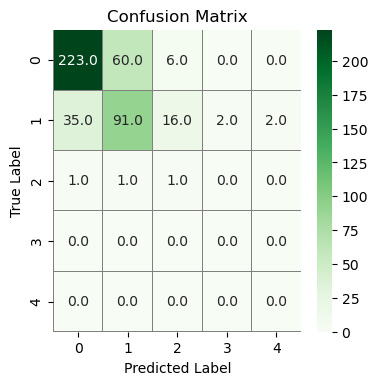

f1-score :0.300305989019064
precision score :0.34564946042881295
recall score :0.30063326647994837


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:

classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2, 5,'uniform' ,30)
classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,10,'uniform' ,30)
classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,15,'uniform' ,30)

classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,5,'distance' ,30)
classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,10,'distance' ,30)
classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,15,'distance' ,30)

classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,5,'uniform' ,60)
classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,10,'uniform' ,60)
classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,15,'uniform' ,60)

classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,5,'distance' ,60)
classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,10,'distance' ,60)
classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,15,'distance' ,60)

### Modelling  And Results

In [39]:
def modellingByAdaBoost(train_dataset,train_result,test_dataset,test_result, num_of_estimators = 100, lr=1, loss ='linear'):
    
    
    standard_scaler = preprocessing.StandardScaler()
    tmp_train_dataset = train_dataset
    tmp_train_result = train_result
    tmp_train_result = tmp_train_result.values.reshape(1,-1) 
    tmp_test_dataset = test_dataset
    tmp_test_result = test_result
    tmp_test_result = tmp_test_result.values.reshape(1,-1)
    
    standard_scaler.fit(tmp_train_dataset)
    standard_scaler.fit(tmp_test_dataset)
    standard_scaler.transform(tmp_train_dataset)
    standard_scaler.transform(tmp_test_dataset)
    
    ada_boost = AdaBoostRegressor(n_estimators=num_of_estimators, random_state=2 ,learning_rate = lr,loss = loss)
    ada_boost.fit(train_dataset, train_result)
    print("=====Ada-Boost Regression(number of estimator : {},learning rate : {},loss: {})======"
              .format(num_of_estimators, lr, loss))
    print('Accuracy of  Ada Boost Regreessor on training set: {:.2f}'
         .format(ada_boost.score(train_dataset, train_result)))
    print('Accuracy of Ada Boost Regreessor on test set: {:.2f}'
         .format(ada_boost.score(test_dataset, test_result)))
    
    
    ada_boost_predict_result = ada_boost.predict(test_dataset)
    
    #print(ada_boost_predict_result)
    result_confusion_matrix = confusion_matrix(np.around(ada_boost_predict_result), test_result) 

    f,ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(result_confusion_matrix, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


    """print("f1-score : " + str(f1_score(test_result, ada_boost_predict_result, average="macro")))
    print("precision score : " + str(precision_score(test_result, ada_boost_predict_result, average="macro")))
    print("recall score : " + str(recall_score(test_result, ada_boost_predict_result, average="macro")))"""
    print("=====================================================")

=====Ada-Boost Regression(number of estimator : 100,learning rate : 1,loss: linear)======
Accuracy of  Ada Boost Regreessor on training set: 0.30
Accuracy of Ada Boost Regreessor on test set: 0.24


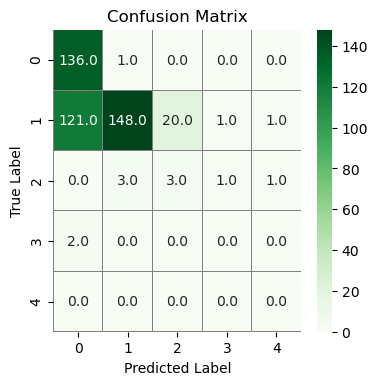

=====Ada-Boost Regression(number of estimator : 150,learning rate : 1,loss: linear)======
Accuracy of  Ada Boost Regreessor on training set: 0.30
Accuracy of Ada Boost Regreessor on test set: 0.24


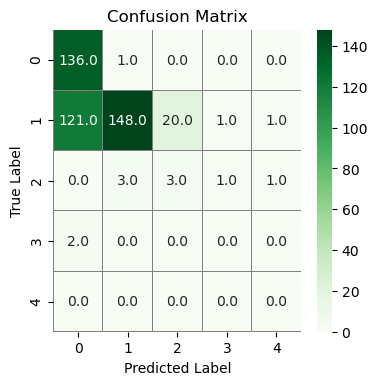

=====Ada-Boost Regression(number of estimator : 200,learning rate : 1,loss: linear)======
Accuracy of  Ada Boost Regreessor on training set: 0.30
Accuracy of Ada Boost Regreessor on test set: 0.24


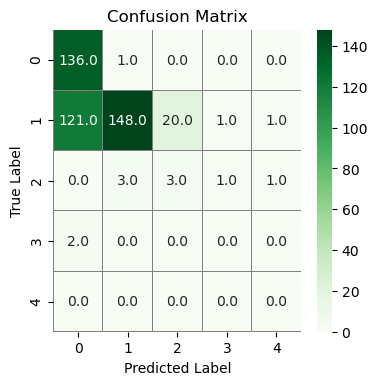

=====Ada-Boost Regression(number of estimator : 100,learning rate : 1,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.59
Accuracy of Ada Boost Regreessor on test set: 0.49


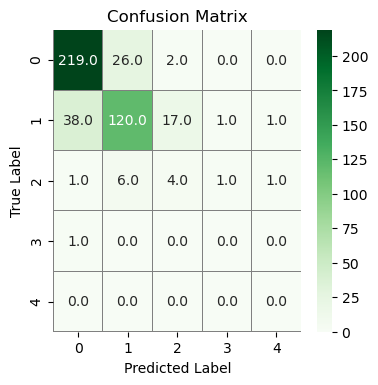

=====Ada-Boost Regression(number of estimator : 150,learning rate : 1,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.58
Accuracy of Ada Boost Regreessor on test set: 0.48


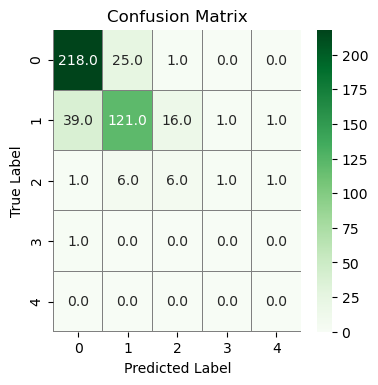

=====Ada-Boost Regression(number of estimator : 200,learning rate : 1,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.58
Accuracy of Ada Boost Regreessor on test set: 0.48


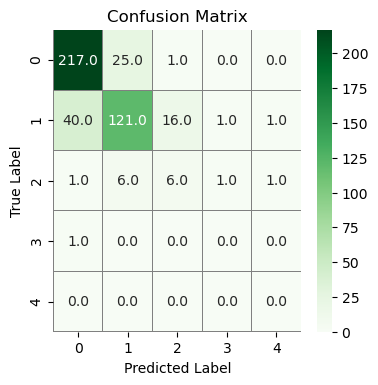

=====Ada-Boost Regression(number of estimator : 100,learning rate : 0.5,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.49
Accuracy of Ada Boost Regreessor on test set: 0.42


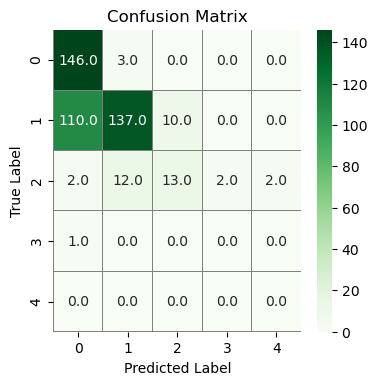

=====Ada-Boost Regression(number of estimator : 150,learning rate : 0.5,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.49
Accuracy of Ada Boost Regreessor on test set: 0.41


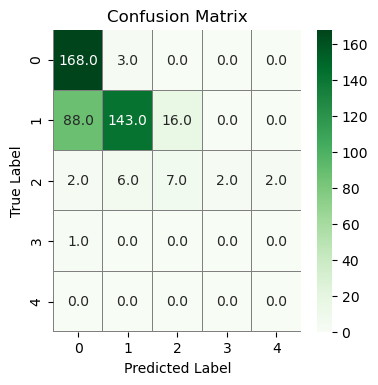

=====Ada-Boost Regression(number of estimator : 200,learning rate : 0.5,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.48
Accuracy of Ada Boost Regreessor on test set: 0.40


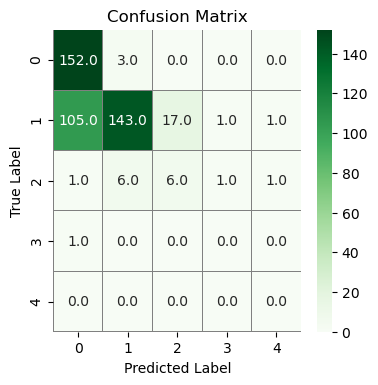

=====Ada-Boost Regression(number of estimator : 100,learning rate : 0.1,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.58
Accuracy of Ada Boost Regreessor on test set: 0.50


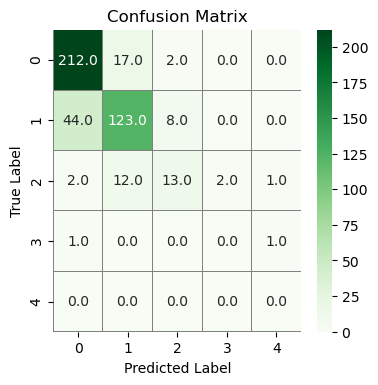

=====Ada-Boost Regression(number of estimator : 150,learning rate : 0.1,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.56
Accuracy of Ada Boost Regreessor on test set: 0.49


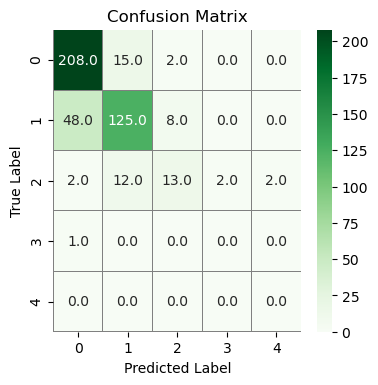

=====Ada-Boost Regression(number of estimator : 200,learning rate : 0.1,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.56
Accuracy of Ada Boost Regreessor on test set: 0.49


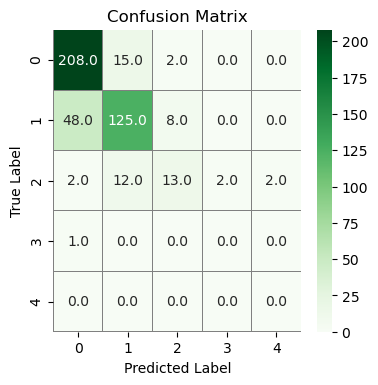

=====Ada-Boost Regression(number of estimator : 100,learning rate : 0.5,loss: exponential)======
Accuracy of  Ada Boost Regreessor on training set: 0.23
Accuracy of Ada Boost Regreessor on test set: 0.18


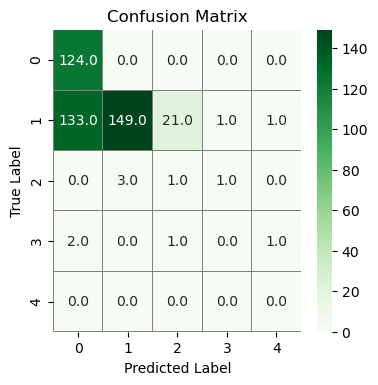

=====Ada-Boost Regression(number of estimator : 150,learning rate : 0.5,loss: exponential)======
Accuracy of  Ada Boost Regreessor on training set: -0.05
Accuracy of Ada Boost Regreessor on test set: -0.08


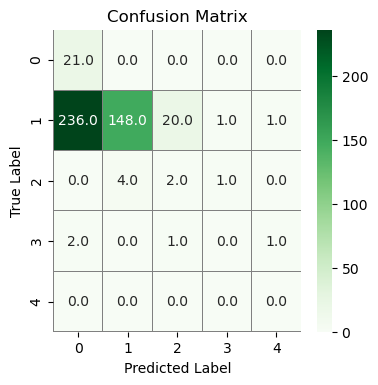

=====Ada-Boost Regression(number of estimator : 200,learning rate : 0.5,loss: exponential)======
Accuracy of  Ada Boost Regreessor on training set: -0.31
Accuracy of Ada Boost Regreessor on test set: -0.33


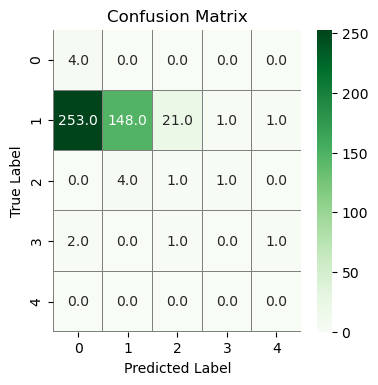

=====Ada-Boost Regression(number of estimator : 100,learning rate : 0.1,loss: exponential)======
Accuracy of  Ada Boost Regreessor on training set: 0.58
Accuracy of Ada Boost Regreessor on test set: 0.53


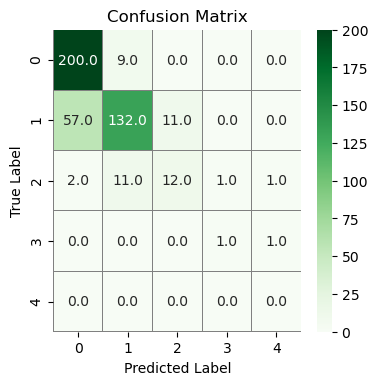

=====Ada-Boost Regression(number of estimator : 150,learning rate : 0.1,loss: exponential)======
Accuracy of  Ada Boost Regreessor on training set: 0.55
Accuracy of Ada Boost Regreessor on test set: 0.51


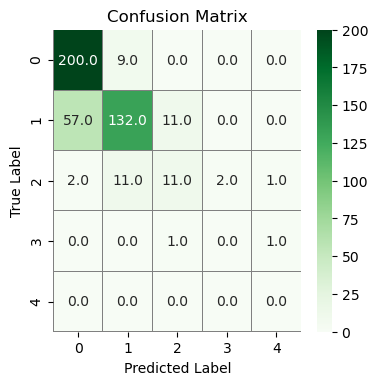

=====Ada-Boost Regression(number of estimator : 200,learning rate : 0.1,loss: exponential)======
Accuracy of  Ada Boost Regreessor on training set: 0.53
Accuracy of Ada Boost Regreessor on test set: 0.48


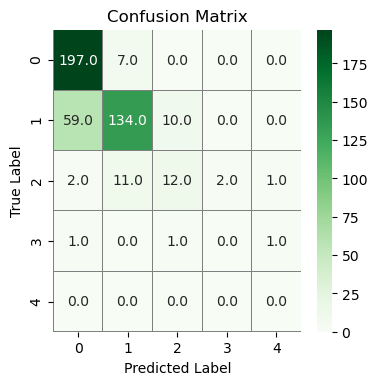

In [40]:
modellingByAdaBoost(train_set,train_result,test_set,test_result, 100)
modellingByAdaBoost(train_set,train_result,test_set,test_result, 150)
modellingByAdaBoost(train_set,train_result,test_set,test_result, 200)

modellingByAdaBoost(train_set,train_result,test_set,test_result, 100, 1, 'square')
modellingByAdaBoost(train_set,train_result,test_set,test_result, 150, 1, 'square')
modellingByAdaBoost(train_set,train_result,test_set,test_result, 200, 1, 'square')

modellingByAdaBoost(train_set,train_result,test_set,test_result, 100,0.5,'square')
modellingByAdaBoost(train_set,train_result,test_set,test_result, 150,0.5,'square')
modellingByAdaBoost(train_set,train_result,test_set,test_result, 200,0.5,'square')

modellingByAdaBoost(train_set,train_result,test_set,test_result, 100,0.1,'square')
modellingByAdaBoost(train_set,train_result,test_set,test_result, 150,0.1,'square')
modellingByAdaBoost(train_set,train_result,test_set,test_result, 200,0.1,'square')

modellingByAdaBoost(train_set,train_result,test_set,test_result, 100,0.5,'exponential')
modellingByAdaBoost(train_set,train_result,test_set,test_result, 150,0.5,'exponential')
modellingByAdaBoost(train_set,train_result,test_set,test_result, 200,0.5,'exponential')

modellingByAdaBoost(train_set,train_result,test_set,test_result, 100,0.1,'exponential')
modellingByAdaBoost(train_set,train_result,test_set,test_result, 150,0.1,'exponential')
modellingByAdaBoost(train_set,train_result,test_set,test_result, 200,0.1,'exponential')


=====Ada-Boost Regression(number of estimator : 100,learning rate : 1,loss: linear)======
Accuracy of  Ada Boost Regreessor on training set: 0.29
Accuracy of Ada Boost Regreessor on test set: 0.22


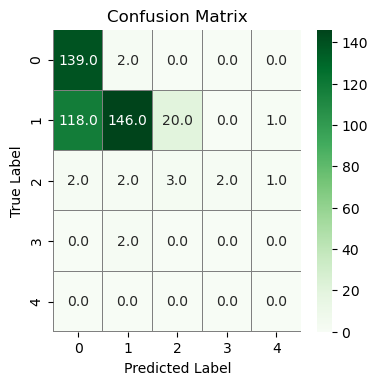

=====Ada-Boost Regression(number of estimator : 150,learning rate : 1,loss: linear)======
Accuracy of  Ada Boost Regreessor on training set: 0.29
Accuracy of Ada Boost Regreessor on test set: 0.22


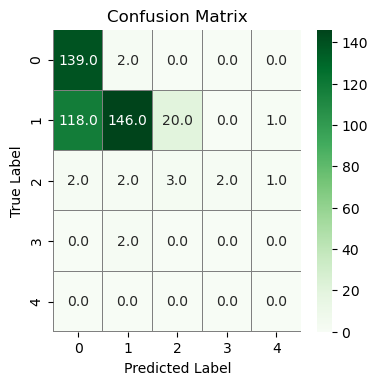

=====Ada-Boost Regression(number of estimator : 200,learning rate : 1,loss: linear)======
Accuracy of  Ada Boost Regreessor on training set: 0.29
Accuracy of Ada Boost Regreessor on test set: 0.22


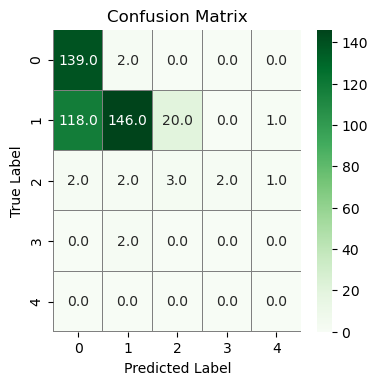

=====Ada-Boost Regression(number of estimator : 100,learning rate : 1,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.16
Accuracy of Ada Boost Regreessor on test set: 0.13


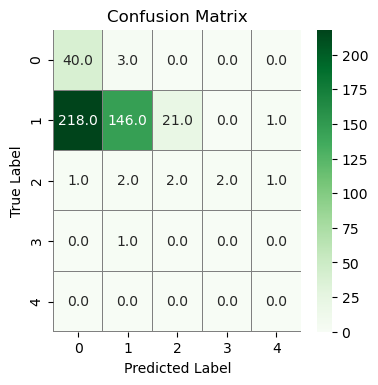

=====Ada-Boost Regression(number of estimator : 150,learning rate : 1,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.11
Accuracy of Ada Boost Regreessor on test set: 0.09


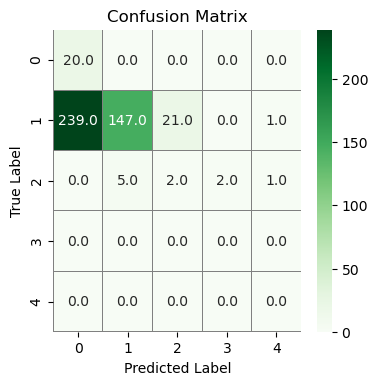

=====Ada-Boost Regression(number of estimator : 200,learning rate : 1,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.06
Accuracy of Ada Boost Regreessor on test set: 0.04


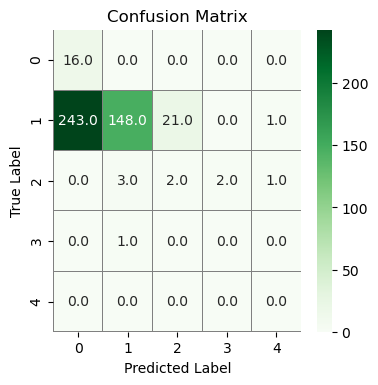

=====Ada-Boost Regression(number of estimator : 100,learning rate : 0.5,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.13
Accuracy of Ada Boost Regreessor on test set: 0.10


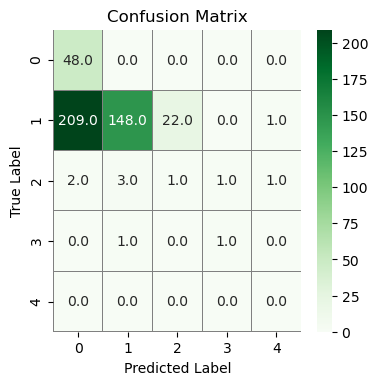

=====Ada-Boost Regression(number of estimator : 150,learning rate : 0.5,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: -0.05
Accuracy of Ada Boost Regreessor on test set: -0.07


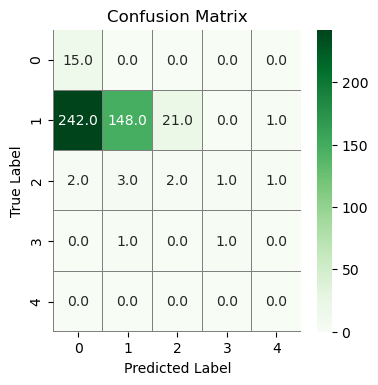

=====Ada-Boost Regression(number of estimator : 200,learning rate : 0.5,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: -0.11
Accuracy of Ada Boost Regreessor on test set: -0.12


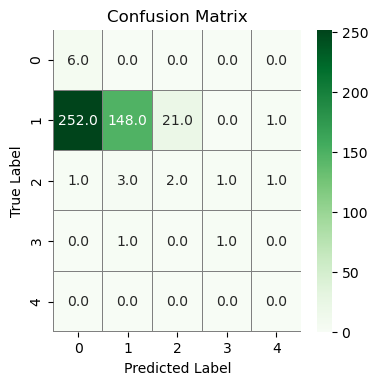

=====Ada-Boost Regression(number of estimator : 100,learning rate : 0.1,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.55
Accuracy of Ada Boost Regreessor on test set: 0.45


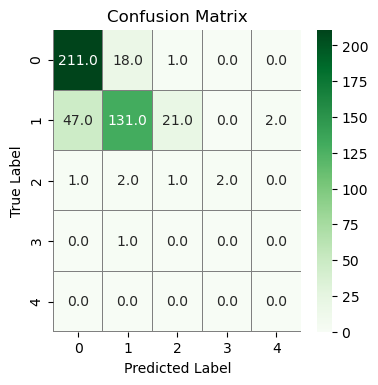

=====Ada-Boost Regression(number of estimator : 150,learning rate : 0.1,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.52
Accuracy of Ada Boost Regreessor on test set: 0.42


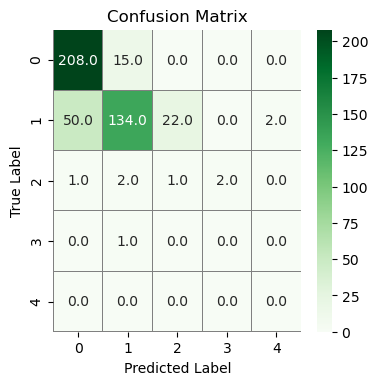

=====Ada-Boost Regression(number of estimator : 200,learning rate : 0.1,loss: square)======
Accuracy of  Ada Boost Regreessor on training set: 0.48
Accuracy of Ada Boost Regreessor on test set: 0.38


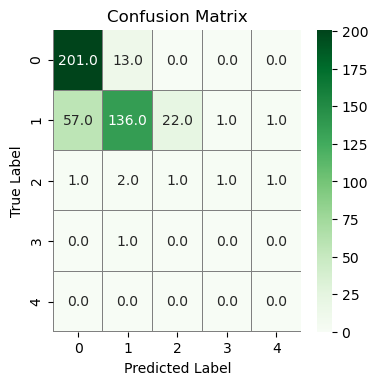

=====Ada-Boost Regression(number of estimator : 100,learning rate : 0.5,loss: exponential)======
Accuracy of  Ada Boost Regreessor on training set: 0.32
Accuracy of Ada Boost Regreessor on test set: 0.27


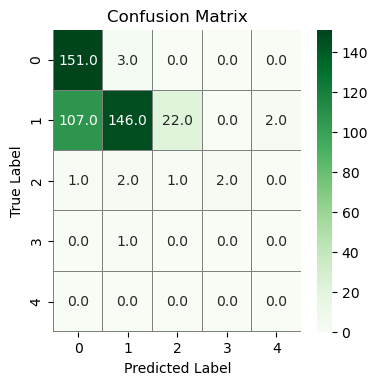

=====Ada-Boost Regression(number of estimator : 150,learning rate : 0.5,loss: exponential)======
Accuracy of  Ada Boost Regreessor on training set: 0.06
Accuracy of Ada Boost Regreessor on test set: 0.06


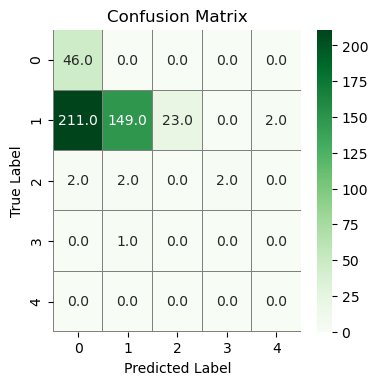

=====Ada-Boost Regression(number of estimator : 200,learning rate : 0.5,loss: exponential)======
Accuracy of  Ada Boost Regreessor on training set: -0.17
Accuracy of Ada Boost Regreessor on test set: -0.16


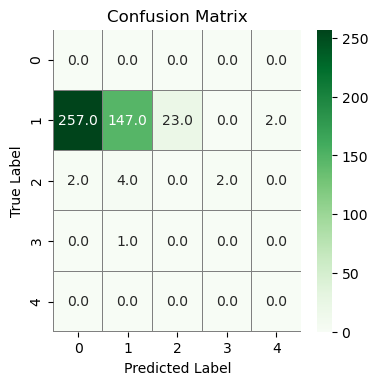

=====Ada-Boost Regression(number of estimator : 100,learning rate : 0.1,loss: exponential)======
Accuracy of  Ada Boost Regreessor on training set: 0.53
Accuracy of Ada Boost Regreessor on test set: 0.46


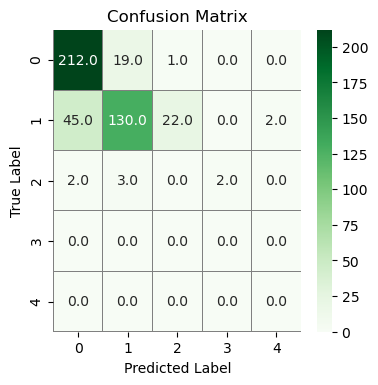

=====Ada-Boost Regression(number of estimator : 150,learning rate : 0.1,loss: exponential)======
Accuracy of  Ada Boost Regreessor on training set: 0.51
Accuracy of Ada Boost Regreessor on test set: 0.44


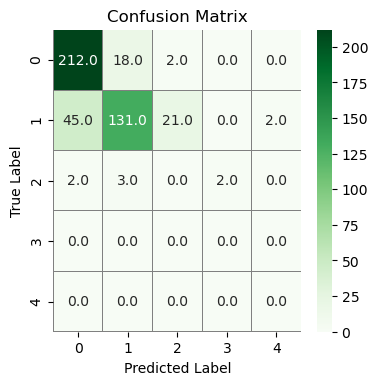

=====Ada-Boost Regression(number of estimator : 200,learning rate : 0.1,loss: exponential)======
Accuracy of  Ada Boost Regreessor on training set: 0.50
Accuracy of Ada Boost Regreessor on test set: 0.42


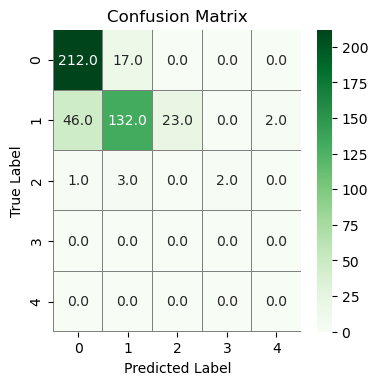

In [41]:

modellingByAdaBoost(train_set2, train_result2, test_set2, test_result2, 100)
modellingByAdaBoost(train_set2, train_result2, test_set2, test_result2, 150)
modellingByAdaBoost(train_set2, train_result2, test_set2, test_result2, 200)

modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 100, 1, 'square')
modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 150, 1, 'square')
modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 200, 1, 'square')

modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 100,0.5,'square')
modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 150,0.5,'square')
modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 200,0.5,'square')

modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 100,0.1,'square')
modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 150,0.1,'square')
modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 200,0.1,'square')

modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 100,0.5,'exponential')
modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 150,0.5,'exponential')
modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 200,0.5,'exponential')

modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 100,0.1,'exponential')
modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 150,0.1,'exponential')
modellingByAdaBoost(train_set2,train_result2,test_set2,test_result2, 200,0.1,'exponential')


### Post Calssification  And Results

In [42]:
def modellingByNaiveBayes(train_dataset,train_result,test_dataset,test_result):
    
    naive_bayes = CategoricalNB()#fit_prior = ,class_prior = )
    naive_bayes.fit(train_dataset, train_result)
    print('Accuracy of Naive Bayes classifier on training set: {:.2f}'
         .format(naive_bayes.score(train_dataset, train_result)))
    print('Accuracy of Naive Bayes classifier on test set: {:.2f}'
         .format(naive_bayes.score(test_dataset, test_result)))
    
    naive_bayes_predict_result = naive_bayes.predict(test_dataset)

    result_confusion_matrix = confusion_matrix(naive_bayes_predict_result, test_result) 

    f,ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(result_confusion_matrix, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


    print("f1-score :" + str(f1_score(test_result, naive_bayes_predict_result, average="macro")))
    print("precision score :" + str(precision_score(test_result, naive_bayes_predict_result, average="macro")))
    print("recall score :" + str(recall_score(test_result, naive_bayes_predict_result, average="macro")))


Accuracy of Naive Bayes classifier on training set: 0.80
Accuracy of Naive Bayes classifier on test set: 0.80


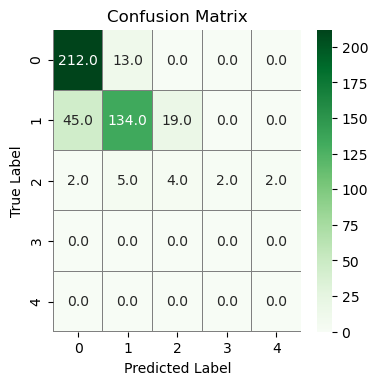

f1-score :0.3704547318709998
precision score :0.3771313131313131
recall score :0.37480496187590007


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:

modellingByNaiveBayes(train_set,train_result,test_set,test_result)

Accuracy of Naive Bayes classifier on training set: 0.82
Accuracy of Naive Bayes classifier on test set: 0.77


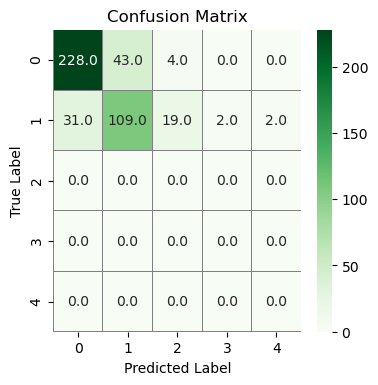

f1-score :0.30919921526663097
precision score :0.29956051310652543
recall score :0.319482828693355


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
modellingByNaiveBayes(train_set2, train_result2, test_set2, test_result2)